LiDAR Data Shape: (500, 500)
Min Elevation: 1070
Max Elevation: 6232
Raster Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 500, 'height': 500, 'count': 4, 'crs': CRS.from_wkt('PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.324975315035,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4277"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","27700"]]'), 'transform': Affine(10.0, 0.0, 500000.0,
       0.0, -10.0, 180000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'pi

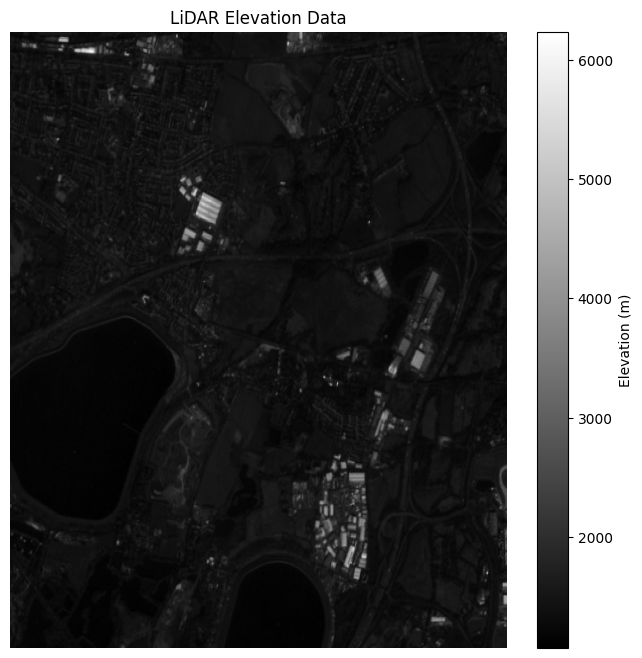

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to your LiDAR TIFF file
lidar_path = "/Users/lauriejoslin/Downloads/viridien-htb/viridien-htb/data/20230215_SE2B_CGG_GBR_MS4_L3_BGRN.tif"  # Replace with your file path

# Open the LiDAR file using rasterio
with rasterio.open(lidar_path) as src:
    lidar_data = src.read(1)  # Read the first band (elevation data)
    profile = src.profile  # Metadata about the raster
    nodata_value = src.nodata  # Get NoData value if present

# Replace NoData values with NaN (optional)
if nodata_value is not None:
    lidar_data = np.where(lidar_data == nodata_value, np.nan, lidar_data)

# Print some information
print(f"LiDAR Data Shape: {lidar_data.shape}")
print(f"Min Elevation: {np.nanmin(lidar_data)}")
print(f"Max Elevation: {np.nanmax(lidar_data)}")
print(f"Raster Metadata: {profile}")

# Plot the LiDAR Data as a Greyscale Image
plt.figure(figsise=(8, 8))
plt.imshow(lidar_data, cmap="gray", aspect="auto")
plt.colorbar(label="Elevation (m)")
plt.title("LiDAR Elevation Data")
plt.axis("off")
plt.show()


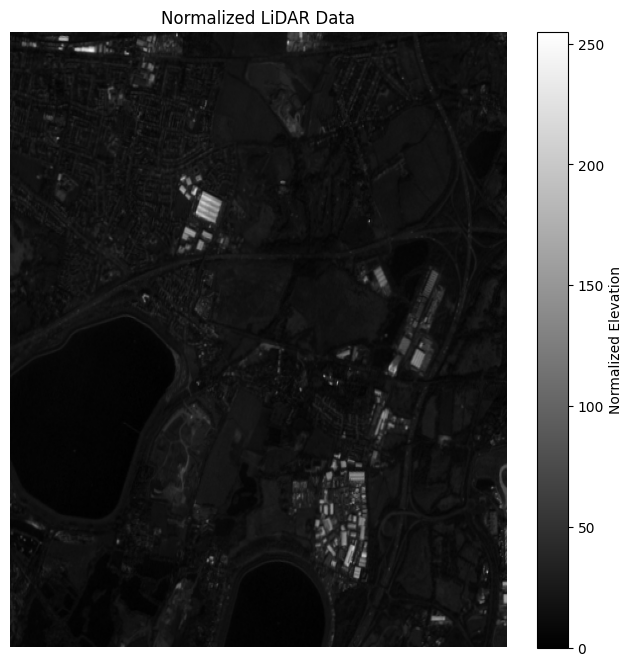

In [3]:
# Normalize LiDAR data to 0–255 (for grayscale conversion)
min_val = np.nanmin(lidar_data)
max_val = np.nanmax(lidar_data)
lidar_normalized = ((lidar_data - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Display the normalized image
plt.figure(figsize=(8, 8))
plt.imshow(lidar_normalized, cmap="gray", aspect="auto")
plt.colorbar(label="Normalized Elevation")
plt.title("Normalized LiDAR Data")
plt.axis("off")
plt.show()


In [7]:
import cv2
import numpy as np
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt

#Paths to the images
pan_path = "/mnt/data/87226d1a-3f6f-46d4-ac20-aa1b7067e2ea.png"  # Grayscale (LiDAR) image
ms_path = "/mnt/data/WhatsApp Image 2025-03-01 at 14.26.43.jpeg"  # Multispectral (RGB) image

#Load the panchromatic image (grayscale)
pan_img = cv2.imread(pan_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)

#Load the multispectral (RGB) image
ms_img = cv2.imread(ms_path, cv2.IMREAD_COLOR).astype(np.float32)
ms_img = cv2.cvtColor(ms_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

#Resize multispectral image to match the panchromatic image dimensions
ms_img_resized = cv2.resize(ms_img, (pan_img.shape[1], pan_img.shape[0]), interpolation=cv2.INTER_CUBIC)

#Perform Brovey pan sharpening
sum_rgb = np.sum(ms_img_resized, axis=2, keepdims=True)
sum_rgb[sum_rgb == 0] = 1  # Prevent division by zero
pan_sharpened = (ms_img_resized / sum_rgb) * pan_img[:, :, np.newaxis]

#Normalize to 0-255 and convert to uint8
pan_sharpened = np.clip(pan_sharpened, 0, 255).astype(np.uint8)

#Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ms_img_resized.astype(np.uint8))
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(pan_sharpened)
plt.title("Pan-Sharpened Image")
plt.axis("off")
plt.show()

#Save the result
output_path = "/mnt/data/pan_sharpened.png"
cv2.imwrite(output_path, cv2.cvtColor(pan_sharpened, cv2.COLOR_RGB2BGR))
print(f"Pan-sharpened image saved at: {output_path}")

[ WARN:0@0.023] global loadsave.cpp:268 findDecoder imread_('/mnt/data/87226d1a-3f6f-46d4-ac20-aa1b7067e2ea.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'astype'

In [6]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 22.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install rasterio numpy scikit-image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 19.7 MB/s eta 0:00:00 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import rasterio
from skimage.transform import resize
from skimage import img_as_float

# Function to pansharpen using a LiDAR grayscale image
def pansharpen(panchromatic_path, multispectral_path, lidar_path, output_path):
    # Read the panchromatic (PAN) image
    with rasterio.open(panchromatic_path) as pan_src:
        pan_image = pan_src.read(1)
        pan_transform = pan_src.transform
        pan_meta = pan_src.meta

    # Read the multispectral (MS) image (assume the first band is RGB)
    with rasterio.open(multispectral_path) as ms_src:
        ms_image = ms_src.read([1, 2, 3])  # RGB bands, modify if needed
        ms_transform = ms_src.transform

    # Read the LiDAR grayscale image
    with rasterio.open(lidar_path) as lidar_src:
        lidar_image = lidar_src.read(1)
        lidar_transform = lidar_src.transform
    
    # Resize LiDAR image to match the PAN image resolution
    lidar_resized = resize(lidar_image, pan_image.shape, preserve_range=True, mode='reflect')

    # Normalize the images
    pan_image = img_as_float(pan_image)
    lidar_resized = img_as_float(lidar_resized)

    # Create a simple pansharpening formula:
    # Sharpen multispectral bands using a weighting derived from LiDAR
    weight_factor = lidar_resized / np.max(lidar_resized)  # Normalize LiDAR to be a weight factor
    
    # Enhance the multispectral bands by the weight factor
    ms_image_enhanced = ms_image * weight_factor

    # Recombine to create the pansharpened image
    pansharpened_image = pan_image * ms_image_enhanced
    
    # Save the pansharpened image
    pan_meta.update(driver='GTiff', count=3, dtype='float32', nodata=0)
    with rasterio.open(output_path, 'w', **pan_meta) as dest:
        dest.write(pansharpened_image.astype(np.float32))

    print(f"Pansharpened image saved to {output_path}")

# Define your file paths
panchromatic_path = '87226d1a-3f6f-46d4-ac20-aa1b7067e2ea'
multispectral_path = 'data/20230215-SE2B-CGG-GBR-MS3-L3-RGB-preview.jpg'
lidar_path = 'data/20230215_SE2B_CGG_GBR_MS4_L3_BGRN.tif'
output_path = ''

# Call the function
pansharpen(panchromatic_path, multispectral_path, lidar_path, output_path)


RasterioIOError: path_to_panchromatic_image.tif: No such file or directory

87226d1a-3f6f-46d4-ac20-aa1b7067e2ea  data/
README.md                             obj1.ipynb
Untitled.ipynb


In [15]:
import numpy as np
import rasterio
from skimage.transform import resize
from skimage import img_as_float

# Function to pansharpen using a LiDAR grayscale image
def pansharpen(panchromatic_path, multispectral_path, lidar_path, output_path):
    # Read the panchromatic (PAN) image
    with rasterio.open(panchromatic_path) as pan_src:
        pan_image = pan_src.read(1)
        pan_transform = pan_src.transform
        pan_meta = pan_src.meta

    # Read the multispectral (MS) image (assume the first band is RGB)
    with rasterio.open(multispectral_path) as ms_src:
        ms_image = ms_src.read([1, 2, 3])  # RGB bands, modify if needed
        ms_transform = ms_src.transform

    # Read the LiDAR grayscale image
    with rasterio.open(lidar_path) as lidar_src:
        lidar_image = lidar_src.read(1)
        lidar_transform = lidar_src.transform
    
    # Resize both the LiDAR and multispectral image to match dimensions
    ms_resized = np.array([resize(ms_band, lidar_image.shape, preserve_range=True, mode='reflect') 
                           for ms_band in ms_image])  # Resize each MS band
    lidar_resized = resize(lidar_image, ms_resized.shape[1:], preserve_range=True, mode='reflect')  # Resize LiDAR

    # Normalize the images
    ms_resized = img_as_float(ms_resized)
    lidar_resized = img_as_float(lidar_resized)

    # Create a simple pansharpening formula:
    # Sharpen multispectral bands using a weighting derived from LiDAR
    weight_factor = lidar_resized / np.max(lidar_resized)  # Normalize LiDAR to be a weight factor
    
    # Enhance the multispectral bands by the weight factor
    ms_image_enhanced = ms_resized * weight_factor

    # Recombine to create the pansharpened image
    pansharpened_image = np.sum(ms_image_enhanced, axis=0)  # Sum the enhanced RGB bands for the output
    
    # Save the pansharpened image
    pan_meta.update(driver='GTiff', count=1, dtype='float32', nodata=0)
    with rasterio.open(output_path, 'w', **pan_meta) as dest:
        dest.write(pansharpened_image.astype(np.float32), 1)

    print(f"Pansharpened image saved to {output_path}")

# Define your file paths
panchromatic_path = '87226d1a-3f6f-46d4-ac20-aa1b7067e2ea'
multispectral_path = 'data/20230215-SE2B-CGG-GBR-MS3-L3-RGB-preview.jpg'
lidar_path = 'data/20230215_SE2B_CGG_GBR_MS4_L3_BGRN.tif'
output_path = 'data/new.tif'

# Call the function
pansharpen(panchromatic_path, multispectral_path, lidar_path, output_path)


Pansharpened image saved to data/new.tif


/Users/lauriejoslin/opt/anaconda3/envs/inf2d-cw1/lib/python3.11/site-packages/rasterio/__init__.py:366: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [16]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import rasterio
from skimage.transform import resize
from skimage import img_as_float
from PIL import Image

# Function to pansharpen using a LiDAR grayscale image and return as JPG
def pansharpen(panchromatic_path, multispectral_path, lidar_path, output_path):
    # Read the panchromatic (PAN) image
    with rasterio.open(panchromatic_path) as pan_src:
        pan_image = pan_src.read(1)
        pan_meta = pan_src.meta

    # Read the multispectral (MS) image (assume the first band is RGB)
    with rasterio.open(multispectral_path) as ms_src:
        ms_image = ms_src.read([1, 2, 3])  # RGB bands, modify if needed

    # Read the LiDAR grayscale image
    with rasterio.open(lidar_path) as lidar_src:
        lidar_image = lidar_src.read(1)
    
    # Resize both the LiDAR and multispectral image to match dimensions
    ms_resized = np.array([resize(ms_band, lidar_image.shape, preserve_range=True, mode='reflect') 
                           for ms_band in ms_image])  # Resize each MS band
    lidar_resized = resize(lidar_image, ms_resized.shape[1:], preserve_range=True, mode='reflect')  # Resize LiDAR

    # Normalize the images
    ms_resized = img_as_float(ms_resized)
    lidar_resized = img_as_float(lidar_resized)

    # Create a simple pansharpening formula:
    # Sharpen multispectral bands using a weighting derived from LiDAR
    weight_factor = lidar_resized / np.max(lidar_resized)  # Normalize LiDAR to be a weight factor
    
    # Enhance the multispectral bands by the weight factor
    ms_image_enhanced = ms_resized * weight_factor

    # Recombine to create the pansharpened image
    pansharpened_image = np.sum(ms_image_enhanced, axis=0)  # Sum the enhanced RGB bands for the output
    
    # Convert the pansharpened image to uint8 format (required for saving as JPEG)
    pansharpened_image = (pansharpened_image * 255).astype(np.uint8)
    
    # Convert the pansharpened image into an RGB format for saving as JPG
    if pansharpened_image.ndim == 2:  # If it's single band, convert to grayscale
        pansharpened_image = np.stack([pansharpened_image] * 3, axis=-1)
    
    # Use PIL to save the image as a JPG file
    pil_image = Image.fromarray(pansharpened_image)
    pil_image.save(output_path, format="JPEG")

    print(f"Pansharpened image saved as {output_path}")

# Define your file paths
panchromatic_path = '87226d1a-3f6f-46d4-ac20-aa1b7067e2ea'
multispectral_path = 'data/20230215-SE2B-CGG-GBR-MS3-L3-RGB-preview.jpg'
lidar_path = 'data/20230215_SE2B_CGG_GBR_MS4_L3_BGRN.tif'
output_path = 'data/new.jpg'

# Call the function
pansharpen(panchromatic_path, multispectral_path, lidar_path, output_path)


Pansharpened image saved as data/new.jpg
